In [24]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [26]:
CV_DV_indices = np.array([ 4,  5,  6,  7, 12, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 31, 33, 35, 37, 39, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66])
CV_DV2 = np.array([ 4,  5,  6,  7, 11, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 29, 31, 33, 35, 37, 53, 54, 57, 58, 59, 60, 61, 62, 63, 64])

In [27]:
set(CV_DV2) - set(CV_DV_indices)

{11, 13, 14, 19, 29, 53, 54, 57, 58}

-

Settings

train = 0 </br>
valid = 1 </br>
test = 2 </br>
global test = 3 </br>

In [28]:
# Тип выборки
MODE = 2
# Номер переменной
VAR = 14 #27 13! 
# Число кластеров с наименьшей MAE на рассмотрение
TOP = 6
# Длина участка визуализации
LEN = 100
#VAR14, LEN75, MODE3

In [29]:
import json
metafile = open("DataSet2_fix.json")
metafile = json.load(metafile)

In [30]:
# #deleted variables:
# deleted = ['consumption_07', 'consumption_09']
# columns = metafile['ColumnKind'].keys()
# CV_DV = [x[0] for x in metafile['ColumnKind'].items() if x[1] == "CV" or x[1] == "DV"]
# CV_DV = [x for x in list(columns) if x in CV_DV and x not in deleted]
# CV_DV_indices = np.array([i for i, x in enumerate(list(columns)) if x in CV_DV and x not in deleted])
# len(CV_DV)

-

In [31]:
FILE_NAME = './results/W20_group60/61_DBSCAN_N81_w1_k25_eps2.0999999999999996.csv'
# data = pd.read_csv("./output_table_04-07_for60_2.csv")
# data = pd.read_csv("./results/W20_group60/14_Agglomer_N11_w5.csv")
data = pd.read_csv('./pulp/W20_group1/29_Agglomer_N5_w10.csv') #28_Agglomer_N2_w10.csv !норм
data = pd.read_csv(FILE_NAME)
# data = pd.read_csv('./pulp/W20_group1/29_Agglomer_N5_w10.csv') #28_Agglomer_N2_w10.csv

# data = pd.read_csv("./results/W20_group60/51_Kmeans_N7_w1.csv")
# data = data[data["mode"].astype("int") == MODE]

In [32]:
data.head()

,real 0,real 1,real 2,real 3,real 4,real 5,real 6,real 7,real 8,real 9,...,predicted 57,predicted 58,predicted 59,predicted 60,predicted 61,predicted 62,predicted 63,predicted 64,cluster_num,mode
0,65.35,59.01,6.3,99.0,6.877206,60.638621,96.988700,56.111976,30.173371,185.4998,...,90.158212,-2.569267,-4.769116,-1.995424,9.342237,52.052535,63.544673,514.678985,0.0,0.0
1,65.35,59.01,6.3,99.0,6.671172,59.757208,96.589930,55.460214,30.256506,185.4998,...,86.460447,-2.789150,-9.450699,-2.037750,14.359894,51.120654,64.856979,512.661253,80.0,0.0
2,65.35,59.01,6.3,99.0,6.697737,59.600586,96.513312,55.576851,30.009617,185.4998,...,83.257415,-1.159522,-14.696113,-2.056159,18.015786,49.860434,65.472149,510.912771,0.0,0.0
3,65.35,59.01,6.3,99.0,6.625373,59.381956,96.467145,55.349525,29.214250,185.4998,...,83.784743,-2.103024,-12.901413,-2.234638,17.221454,49.434529,66.074870,510.579489,0.0,0.0
4,65.35,59.01,6.3,99.0,6.667358,59.058685,96.425264,55.494705,28.949559,185.4998,...,83.723921,-2.460834,-12.515668,-1.998172,16.949307,49.317582,64.317132,510.656930,0.0,0.0


In [33]:
# new_data = pd.DataFrame(data, columns=[])

In [34]:
# metafile = open("DataSet2_fix.json")
# metafile = json.load(metafile)


In [35]:
# CV_DV = [x[0] for x in metafile['ColumnKind'].items() if x[1] == "CV" or x[1] == "DV"]
# CV_DV = [x for x in list(columns) if x in CV_DV]
# # data = data[CV_DV]
# CV_DV

In [36]:
data.loc[:, ["real 0", "real 23", "real 8", "predicted 0", "predicted 8", "predicted 23", "cluster_num", "mode"]]

,real 0,real 23,real 8,predicted 0,predicted 8,predicted 23,cluster_num,mode
0,65.35,65.762724,30.173371,65.355889,30.273043,56.597813,0.0,0.0
1,65.35,74.639272,30.256506,65.349951,30.214873,67.325769,80.0,0.0
2,65.35,75.529258,30.009617,65.351652,30.303455,75.270943,0.0,0.0
3,65.35,75.443091,29.214250,65.342790,30.089080,74.717584,0.0,0.0
4,65.35,74.734511,28.949559,65.346293,29.245410,74.918235,0.0,0.0
...,...,...,...,...,...,...,...,...
33982,67.40,49.725883,46.669343,67.400028,46.875293,48.434634,80.0,2.0
33983,67.40,51.598239,46.631150,67.400026,46.663631,50.242364,80.0,2.0
33984,67.40,55.092504,46.807692,67.400002,46.641974,51.937616,80.0,2.0
33985,67.40,55.905058,47.224086,67.400012,46.794696,56.407582,80.0,2.0


Оценим переменные

In [37]:
real = [x for x in data.columns if "real" in x]
predicted = [x for x in data.columns if "predicted" in x]
err = abs(data[real].values - data[predicted].values)
err = err[data["mode"] == MODE]
pd.DataFrame([dict(zip(real, err.mean(axis=0)))]).T.sort_values(0)[:10]

,0
real 16,0.007340
real 28,0.007385
real 3,0.031157
real 2,0.032894
real 6,0.051240
real 0,0.056419
real 1,0.076596
real 4,0.128047
real 60,0.139979
real 5,0.172392


In [38]:
data["mode"].value_counts()

0.0    20395
1.0     6797
2.0     6795
Name: mode, dtype: int64

In [39]:
AE = abs(data[f"real {VAR}"] - data[f"predicted {VAR}"])
AE = pd.DataFrame(dict(AE=AE, cluster_num=data["cluster_num"]))

In [40]:
AE

,AE,cluster_num
0,0.191566,0.0
1,0.271310,80.0
2,0.088463,0.0
3,0.087940,0.0
4,0.119793,0.0
...,...,...
33982,0.543499,80.0
33983,0.598287,80.0
33984,0.017206,80.0
33985,0.078375,80.0


In [41]:
top = [AE[AE["cluster_num"] == c]["AE"].mean() for c in np.arange(AE["cluster_num"].max() + 1)]
top = np.argsort(top)

In [42]:
top

array([ 6,  4,  7,  3, 16, 46, 69, 45,  5, 53, 43, 62, 11, 56,  8, 64, 44,
       57, 47, 58, 52, 63, 27, 32, 24, 50, 28, 21, 19, 60,  0, 36, 59, 65,
       12, 35, 14, 20, 13,  1, 29, 54, 39, 18, 41, 17, 48, 25, 23, 51, 34,
       77, 72, 76, 66, 49, 71, 61, 55, 78, 15, 31, 42, 70, 10,  9, 74, 37,
       22, 33, 26, 75, 38, 73, 67, 68,  2, 30, 79, 40, 80])

In [43]:
AE[AE["cluster_num"] == 1]["AE"].mean()

0.21445755843722508

-

# Визуализация

(188, 2)
(28, 2)
(145, 2)
(95, 2)
(173, 2)
(30, 2)


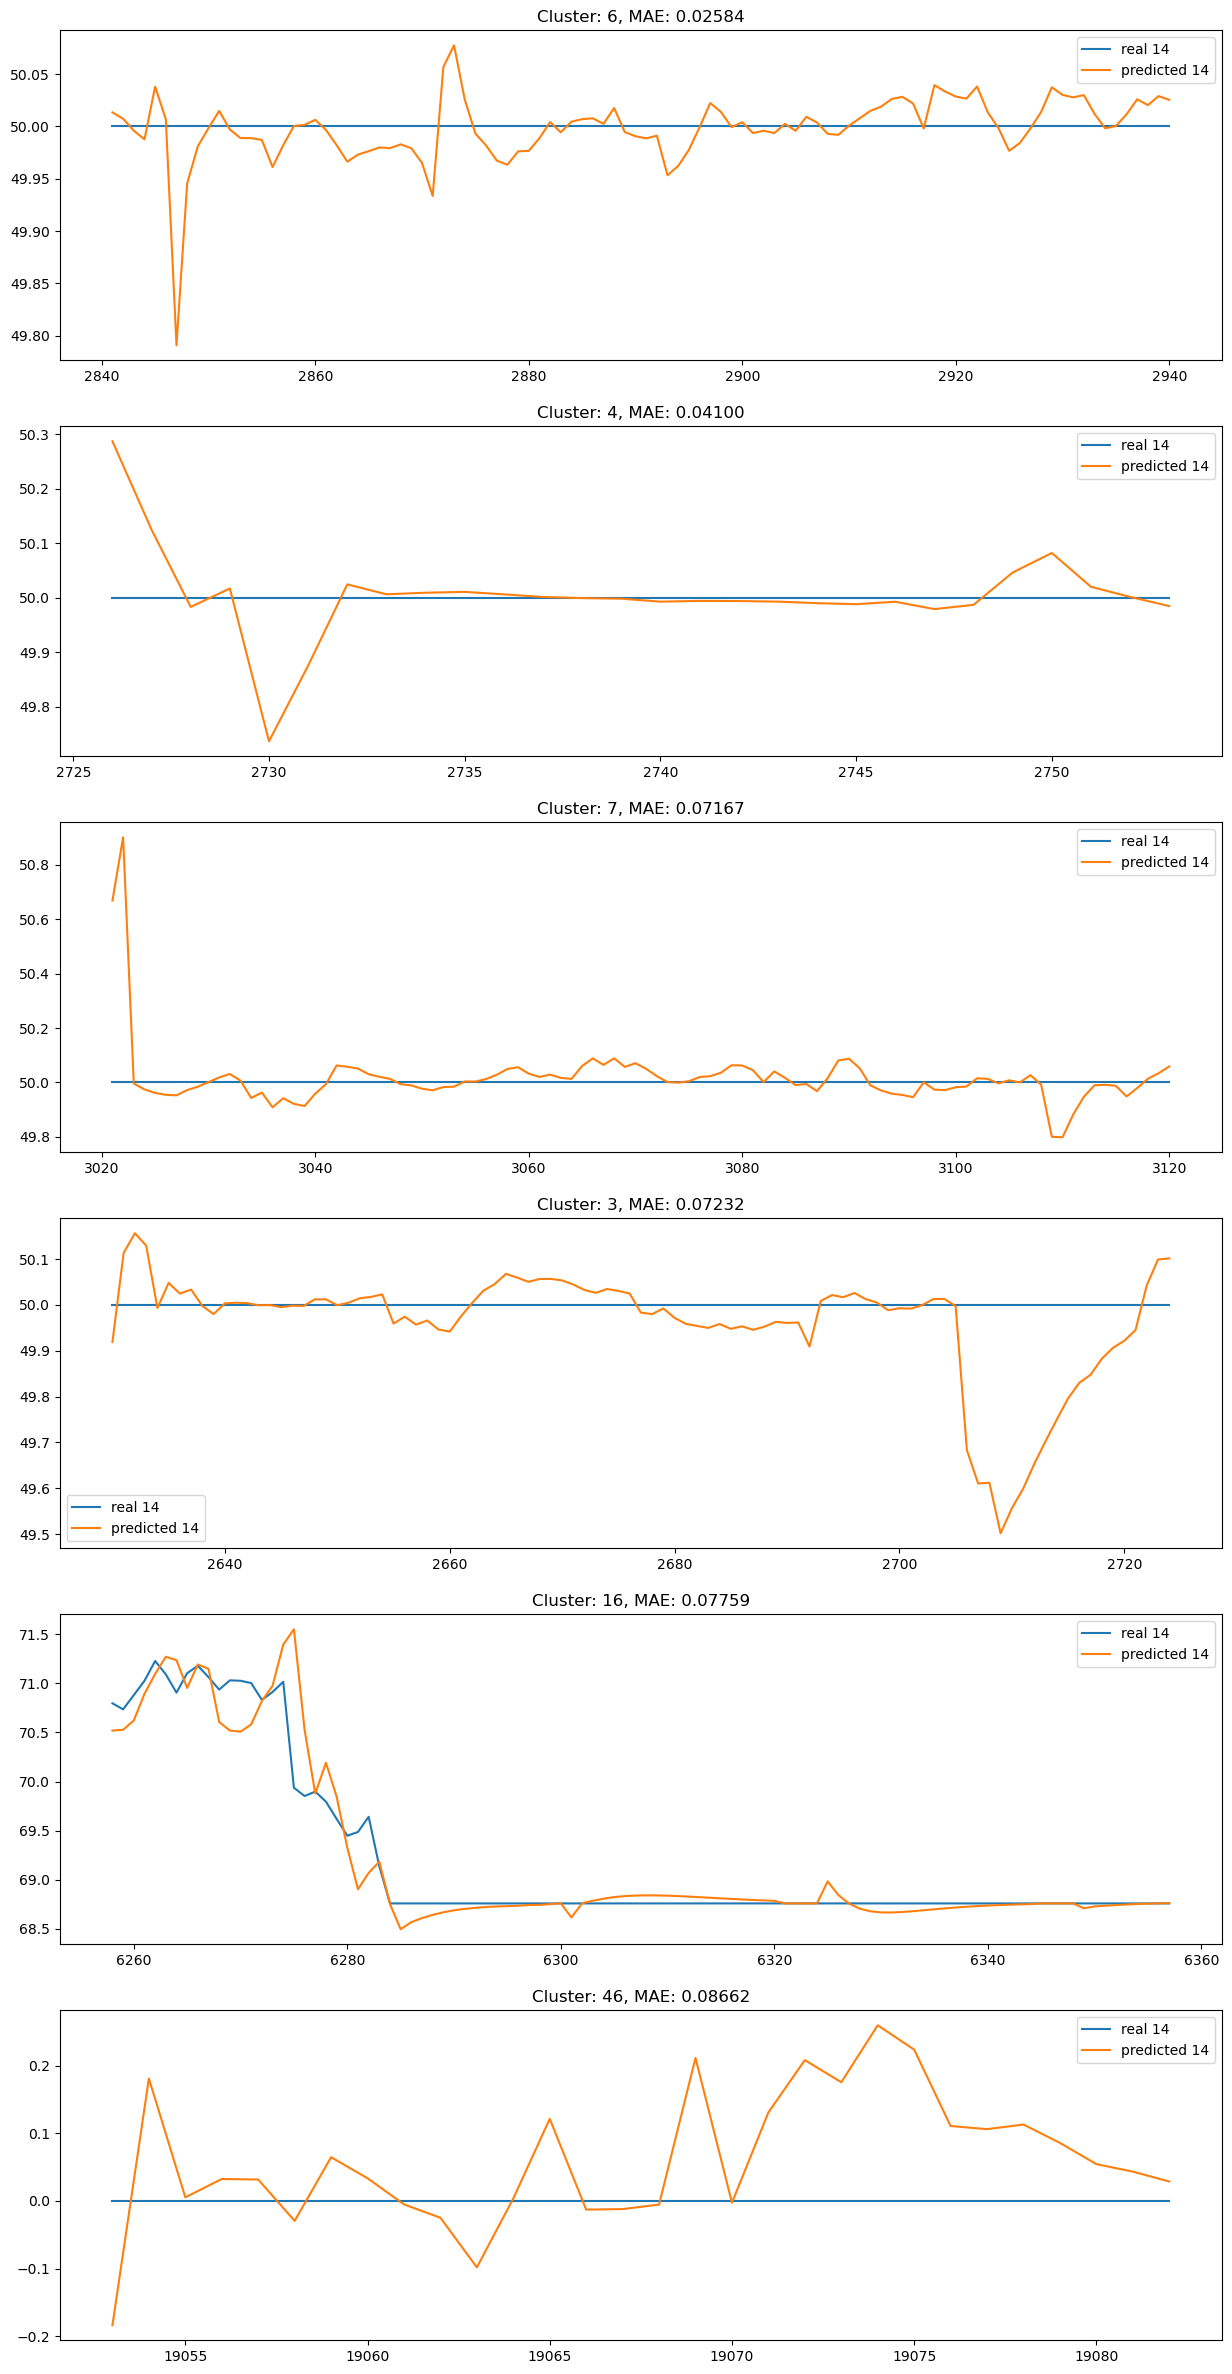

In [44]:
plt.figure(figsize=(3, 6))
for i in range(min(TOP, len(top))):
    #print(int(f"{i+1}1{TOP}"))
    
    plt.subplot(int(f"{TOP}1{i+1}"))#, figure=plt.Figure(figsize=(8, 6)))
    index = AE["cluster_num"] == top[i]
#     plt.title(f"Cluster: {top[i]}, MAE: {AE[index]['AE'].mean():.5f}, Size: {sum(AE['cluster_num'] == top[i])}")
    plt.title(f"Cluster: {top[i]}, MAE: {AE[index]['AE'].mean():.5f}")
    cluster = data[[f"real {VAR}", f"predicted {VAR}"]][index]
    print(cluster.shape)
    # find continous index
#     print(cluster.index.shape)
    cont = np.split(cluster, np.where(np.diff(cluster.index) > 1)[0] + 1)
#     print([len(x) for x in cont])
    ind = np.argmax([len(x) for x in cont])
#     chunk = [x for x in cont if len(x) > LEN][-1]
    chunk = cont[ind]
    start = LEN * 0 // 5
    if top[i] == 1:
        start += 10
#     if (top[i] in [2, 4]):
#         start = 0
    plt.plot(chunk[start:start+LEN])
#     plt.plot(chunk[-LEN:])
    plt.legend(chunk.columns)
    
plt.gcf().set_size_inches(15, 5 * TOP)
# plt.savefig("top_clusters_visualize.png")
plt.show()

<AxesSubplot:>

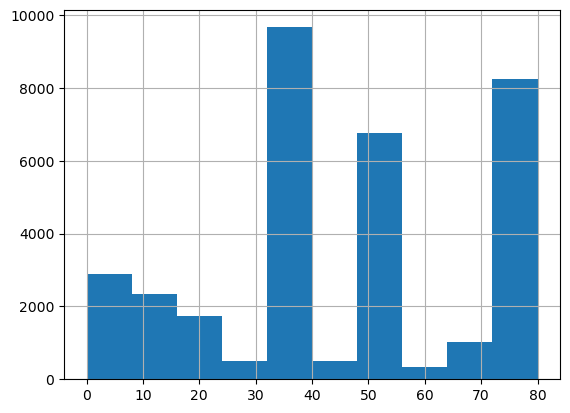

In [45]:
data.cluster_num.hist()